**Chapter 01 – Starting The Machine Learning**

_Task 01 - Linear Regression Model Prediction_

# Setup

In [44]:
#********************************************************************
# Common Imports
#********************************************************************

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
import pandas as pd
import sklearn
import os

# Plot Setup

In [45]:
# to make this notebook's output stable across runs
rnd.seed(42)

#*******************************************************************
# To plot pretty figures
#*******************************************************************
%matplotlib inline

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = r"C:/Users/pr003gu/Desktop/Learning/Current/handson-ml/"
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Load and prepare Life satisfaction data

In [51]:
#*******************************************************************
#Load the data
# Download CSV from http://stats.oecd.org/index.aspx?DataSetCode=BLI
#*******************************************************************

data_path = "datasets/lifesat/"

csv_file = data_path + "BLI_22052017103508839.csv"
gdp_file = data_path + "gdp_per_capita.csv"

print("Reading CSV File :", csv_file, "\n")
oecd_bli = pd.read_csv(csv_file, thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(3)

Reading CSV File : datasets/lifesat/BLI_22052017103508839.csv 



Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,6.0,1.1,77.0,13.39,72.0,62.6,0.8,33138.0,48836.0,20.0,...,51148.0,95.0,2.3,85.0,2.7,512.0,14.35,93.0,94.0,19.2
Austria,15.0,1.0,84.0,7.32,71.0,81.2,0.4,31667.0,55623.0,21.0,...,45988.0,93.0,1.6,69.0,1.3,500.0,14.55,75.0,93.0,17.1
Belgium,19.0,2.1,74.0,4.73,62.0,69.6,1.1,28700.0,89057.0,21.0,...,48093.0,88.0,2.2,74.0,2.2,509.0,15.77,89.0,83.0,18.8


In [60]:
oecd_bli["Life satisfaction"].head(2)

Country
Australia    7.3
Austria      7.1
Name: Life satisfaction, dtype: float64

In [59]:
oecd_bli["Air pollution"].head(3)

Country
Australia     6.0
Austria      15.0
Belgium      19.0
Name: Air pollution, dtype: float64

# Load and prepare GDP per capita data

In [78]:
print("Reading gdp File :", gdp_file, "\n")
gdp_per_capita = pd.read_csv(gdp_file,thousands=',',delimiter='\t',
encoding='latin1', na_values="n/a")

gdp_per_capita.rename(columns= {"2015" : "GDP per capita"}, inplace= True)
gdp_per_capita.set_index("Country", inplace= True)
gdp_per_capita.head(3)

Reading gdp File : datasets/lifesat/gdp_per_capita.csv 



,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0


In [79]:
gdp_per_capita["Units"].head(2)


Country
Afghanistan    U.S. dollars
Albania        U.S. dollars
Name: Units, dtype: object

# Prepare Country Stats

In [91]:
#********************************************************************
# Merge and sort Data Frames
#********************************************************************

full_country_stats = pd.merge(left = oecd_bli, right = gdp_per_capita, left_index= True, right_index= True)
full_country_stats.sort_values(by ="GDP per capita", inplace= True)
full_country_stats

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
South Africa,14.0,20.5,65.0,18.07,43.0,39.8,9.6,8712.0,16937.0,18.0,...,14.73,73.0,69.0,15.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",5694.572,2014.0
Brazil,17.0,6.7,46.0,9.45,67.0,39.5,26.7,11487.0,7566.0,21.0,...,14.27,79.0,73.0,15.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,12.0,4.2,34.0,28.28,60.0,39.9,23.4,12806.0,9856.0,22.0,...,12.80,63.0,68.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,14.0,14.4,95.0,0.18,69.0,52.9,11.3,17006.0,3687.0,11.0,...,14.91,65.0,49.0,16.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,17.0,7.6,36.0,39.26,50.0,60.4,1.7,13471.0,3886.0,21.0,...,12.24,85.0,63.0,16.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,16.0,5.3,83.0,3.76,62.0,53.2,1.2,15614.0,17774.0,20.0,...,15.04,62.0,76.0,17.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,17.0,3.1,91.0,7.25,62.0,66.1,1.0,17820.0,12902.0,22.0,...,14.42,55.0,80.0,17.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,18.0,9.4,61.0,13.84,62.0,50.2,3.8,15094.0,18172.0,18.0,...,14.91,49.0,71.0,17.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Latvia,12.0,14.7,90.0,2.45,66.0,61.6,6.1,13655.0,9837.0,26.0,...,13.83,59.0,76.0,17.8,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13618.569,2015.0


In [93]:
full_country_stats["Life satisfaction"].loc["Canada"]

7.4000000000000004

In [130]:
full_country_stats[["GDP per capita", 'Life satisfaction']].loc["United States"]

GDP per capita       55805.204
Life satisfaction        6.900
Name: United States, dtype: float64

In [138]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_air_data = full_country_stats[["GDP per capita", 'Air pollution']].iloc[keep_indices]


# Few Plottings

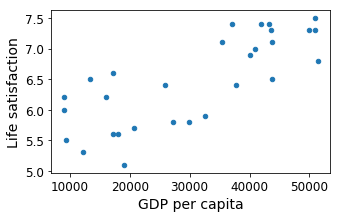

In [102]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))

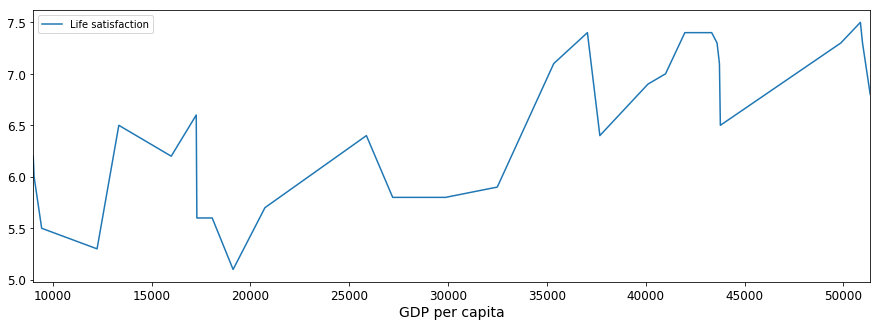

In [106]:
sample_data.plot(kind='Line', x="GDP per capita", y='Life satisfaction', figsize=(15,5))

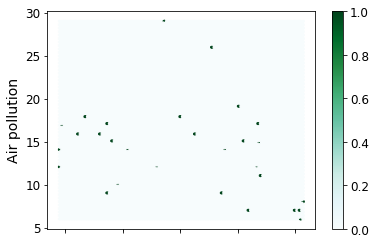

In [115]:
sample_air_data.plot.hexbin(x = "GDP per capita", y = "Air pollution")

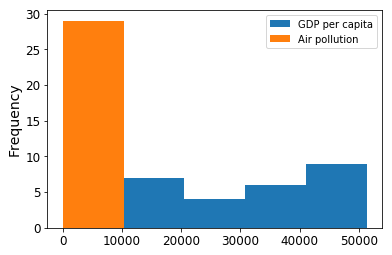

In [121]:
sample_air_data.plot.hist(by = "Air pollution", bins = 5)

Saving figure money_happy_scatterplot


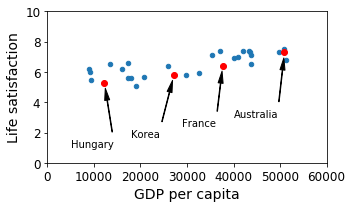

In [137]:
sample_data.plot.scatter(x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0,60000,0,10])


position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
}

for country, pos_text in position_text.items():
    
    pos_data_x, pos_data_y = sample_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    
    plt.plot(pos_data_x, pos_data_y, "ro")
    
save_fig('money_happy_scatterplot')

plt.show()

In [135]:
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Korea,27195.197,5.8
Australia,50961.865,7.3
Hungary,12239.894,5.3
France,37675.006,6.4


Saving figure tweaking_model_params_plot


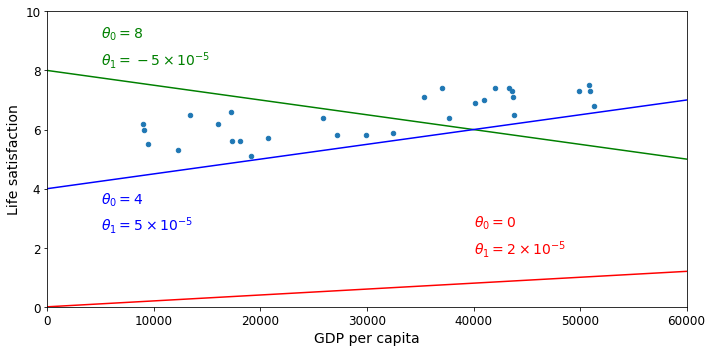

In [158]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(10,5))

plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000,500)
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")
plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")
save_fig('tweaking_model_params_plot')
plt.show()

In [143]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(5.2554414175361899, 3.9650808385639476e-05)

Saving figure best_fit_model_plot


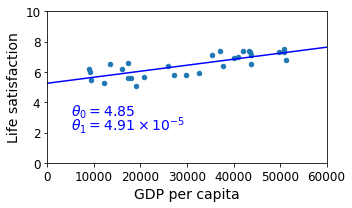

In [144]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
save_fig('best_fit_model_plot')
plt.show()

In [145]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
print(cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction = lin1.predict(cyprus_gdp_per_capita)[0][0]
cyprus_predicted_life_satisfaction

22587.49


6.1510536554387381

In [163]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3), s=1)
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = 6.15",, fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
save_fig('cyprus_prediction_plot')
plt.show()

SyntaxError: invalid syntax (<ipython-input-163-2d64a1499ce6>, line 8)

In [147]:
sample_data[7:10]


,GDP per capita,Life satisfaction
Country,,
Estonia,17288.083,5.6
Greece,18064.288,5.6
Portugal,19121.592,5.1


In [148]:
(5.1+5.7+6.5)/3

5.766666666666667

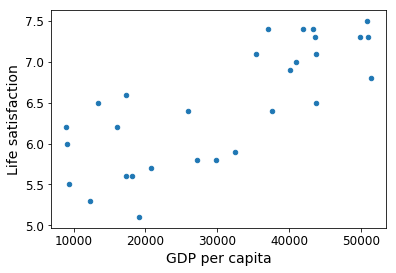

[[ 6.15103423]]


In [150]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    return sample_data
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()
# Select a linear model
lin_reg_model = linear_model.LinearRegression()
# Train the model
lin_reg_model.fit(X, y)
# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus' GDP per capita
print(lin_reg_model.predict(X_new)) # outputs [[ 5.96242338]]